In [13]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt

C:\Users\madst\AppData\Local\Temp\ipykernel_25792\2736219923.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gdp['Time'] = pd.to_datetime(gdp['Time'])


Data types in 'indu' dataframe:
Time     datetime64[ns]
Value             int64
dtype: object

Data types in 'cons' dataframe:
Time     datetime64[ns]
Value           float64
dtype: object

Data types in 'gdp' dataframe:
Time     datetime64[ns]
Value           float64
dtype: object


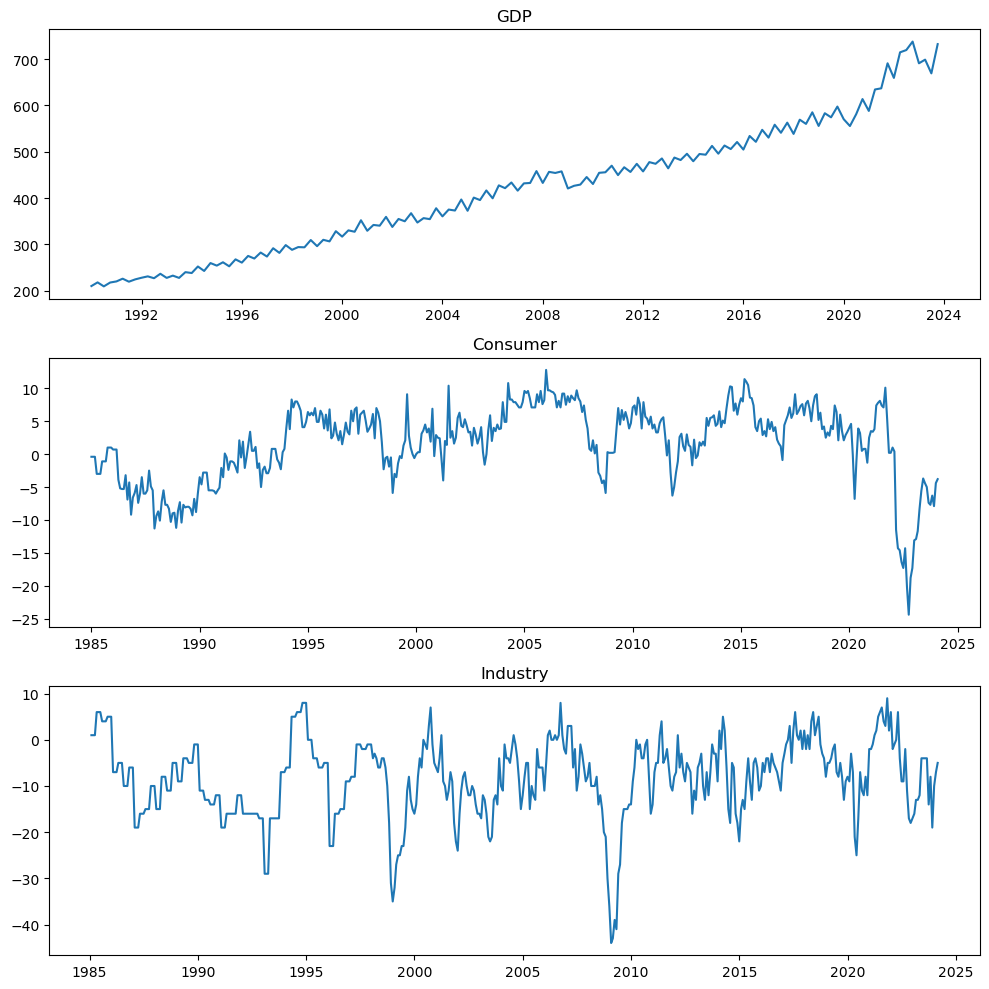

C:\Users\madst\AppData\Local\Temp\ipykernel_25792\3324521213.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  indu_quarterly = indu.resample('Q', on='Time').mean()
C:\Users\madst\AppData\Local\Temp\ipykernel_25792\3324521213.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  cons_quarterly = cons.resample('Q', on='Time').mean()


Value           float64
Time     datetime64[ns]
dtype: object
Value           float64
Time     datetime64[ns]
dtype: object


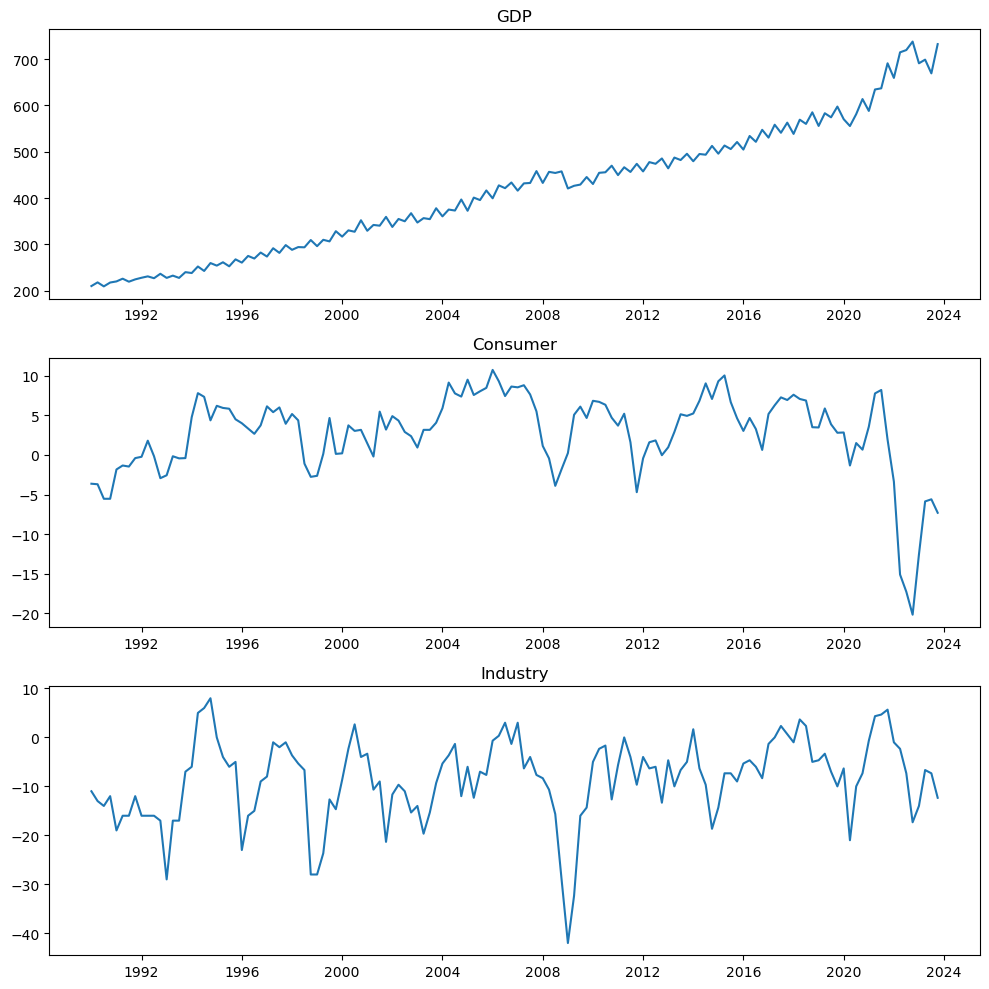

In [1]:
# Run the stored data from the Data_Preparation.ipynb
%run ..//Data_Preparation.ipynb

In [15]:
#Using the period 1990-2015 for training and 2016-2020 for testing
indu_train = indu[(indu['Time'] >= '1990-01-01') & (indu['Time'] < '2016-01-01')]
cons_train = cons[(cons['Time'] >= '1990-01-01') & (cons['Time'] < '2016-01-01')]
gdp_train = gdp[(gdp['Time'] >= '1990-01-01') & (gdp['Time'] < '2016-01-01')]

indu_test = indu[(indu['Time'] >= '2016-01-01') & (indu['Time'] < '2020-01-01')]
cons_test = cons[(cons['Time'] >= '2016-01-01') & (cons['Time'] < '2020-01-01')]
gdp_test = gdp[(gdp['Time'] >= '2016-01-01') & (gdp['Time'] < '2020-01-01')]

In [16]:
from statsmodels.tsa.stattools import adfuller

# Perform augmented Dickey-Fuller test for gdp
adf_gdp = adfuller(gdp_train['Value'])
print("Augmented Dickey-Fuller test for GDP:")
print("ADF Statistic:", adf_gdp[0])
print("p-value:", adf_gdp[1])
print("Critical Values:")
for key, value in adf_gdp[4].items():
    print(key, ":", value)

# Perform augmented Dickey-Fuller test for indu
adf_indu = adfuller(indu_train['Value'])
print("\nAugmented Dickey-Fuller test for Industry:")
print("ADF Statistic:", adf_indu[0])
print("p-value:", adf_indu[1])
print("Critical Values:")
for key, value in adf_indu[4].items():
    print(key, ":", value)

# Perform augmented Dickey-Fuller test for cons
adf_cons = adfuller(cons_train['Value'])
print("\nAugmented Dickey-Fuller test for Consumer:")
print("ADF Statistic:", adf_cons[0])
print("p-value:", adf_cons[1])
print("Critical Values:")
for key, value in adf_cons[4].items():
    print(key, ":", value)

#GDP is not stationary, but Industry and Consumption is. We will difference all variables to make it stationary.

Augmented Dickey-Fuller test for GDP:
ADF Statistic: -0.7318796461601637
p-value: 0.8383183042733207
Critical Values:
1% : -3.505190196159122
5% : -2.894232085048011
10% : -2.5842101234567902

Augmented Dickey-Fuller test for Industry:
ADF Statistic: -5.685744722191738
p-value: 8.287404342093235e-07
Critical Values:
1% : -3.498198082189098
5% : -2.891208211860468
10% : -2.5825959973472097

Augmented Dickey-Fuller test for Consumer:
ADF Statistic: -3.599747914438429
p-value: 0.005765848915308245
Critical Values:
1% : -3.4961490537199116
5% : -2.8903209639580556
10% : -2.5821223452518263


In [17]:
#Differencing the data for both training and testing
gdp_train['diff'] = gdp_train['Value'].diff()
cons_train['diff'] = cons_train['Value'].diff()
indu_train['diff'] = indu_train['Value'].diff()

gdp_test['diff'] = gdp_test['Value'].diff()
cons_test['diff'] = cons_test['Value'].diff()
indu_test['diff'] = indu_test['Value'].diff()

C:\Users\madst\AppData\Local\Temp\ipykernel_12592\2592117011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_train['diff'] = gdp_train['Value'].diff()
C:\Users\madst\AppData\Local\Temp\ipykernel_12592\2592117011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cons_train['diff'] = cons_train['Value'].diff()
C:\Users\madst\AppData\Local\Temp\ipykernel_12592\2592117011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [18]:
#Checking if the differencing made the data stationary
# Perform augmented Dickey-Fuller test for gdp
adf_gdp = adfuller(gdp_train['diff'].dropna())
print("Augmented Dickey-Fuller test for GDP:")
print("ADF Statistic:", adf_gdp[0])
print("p-value:", adf_gdp[1])
print("Critical Values:")
for key, value in adf_gdp[4].items():
    print(key, ":", value)

# Perform augmented Dickey-Fuller test for indu
adf_indu = adfuller(indu_train['diff'].dropna())
print("\nAugmented Dickey-Fuller test for Industry:")
print("ADF Statistic:", adf_indu[0])
print("p-value:", adf_indu[1])
print("Critical Values:")
for key, value in adf_indu[4].items():
    print(key, ":", value)

# Perform augmented Dickey-Fuller test for cons
adf_cons = adfuller(cons_train['diff'].dropna())
print("\nAugmented Dickey-Fuller test for Consumer:")
print("ADF Statistic:", adf_cons[0])
print("p-value:", adf_cons[1])
print("Critical Values:")
for key, value in adf_cons[4].items():
    print(key, ":", value)

#The variables are now stationary.

Augmented Dickey-Fuller test for GDP:
ADF Statistic: -3.6366165291531702
p-value: 0.005098372286943398
Critical Values:
1% : -3.505190196159122
5% : -2.894232085048011
10% : -2.5842101234567902

Augmented Dickey-Fuller test for Industry:
ADF Statistic: -5.512882688109425
p-value: 1.9541530320366127e-06
Critical Values:
1% : -3.5019123847798657
5% : -2.892815255482889
10% : -2.583453861475781

Augmented Dickey-Fuller test for Consumer:
ADF Statistic: -8.313151175739327
p-value: 3.7416536303525e-13
Critical Values:
1% : -3.4968181663902103
5% : -2.8906107514600103
10% : -2.5822770483285953


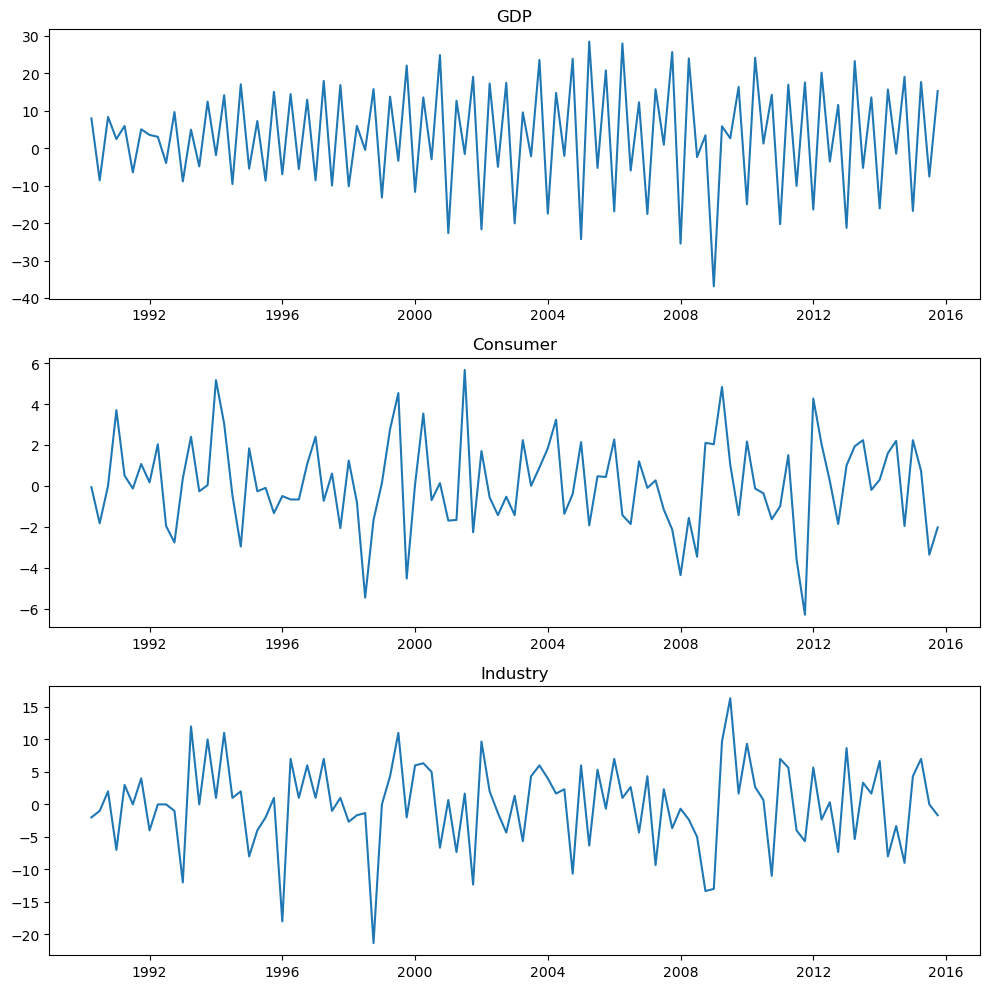

In [19]:
#Plotting the differenced data
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Plotting gdp
axs[0].plot(gdp_train['Time'], gdp_train['diff'])
axs[0].set_title('GDP')

# Plotting cons
axs[1].plot(cons_train['Time'], cons_train['diff'])
axs[1].set_title('Consumer')

# Plotting indu
axs[2].plot(indu_train['Time'], indu_train['diff'])
axs[2].set_title('Industry')

# Adjusting the layout
plt.tight_layout()

# Display the plots
plt.show()

#Plots show gdp is stationary, but heteroscedastic. We will use a log transformation to fix this.

In [20]:
print(gdp_train)
print(cons_train)
print(indu_train)


          Time  Value  diff
0   1990-01-01  210.2   NaN
1   1990-04-01  218.1   7.9
2   1990-07-01  209.5  -8.6
3   1990-10-01  217.8   8.3
4   1991-01-01  220.2   2.4
..         ...    ...   ...
99  2014-10-01  512.7  19.0
100 2015-01-01  495.9 -16.8
101 2015-04-01  513.5  17.6
102 2015-07-01  505.9  -7.6
103 2015-10-01  521.1  15.2

[104 rows x 3 columns]
         Value       Time      diff
20   -3.633333 1990-01-01       NaN
21   -3.700000 1990-04-01 -0.066667
22   -5.533333 1990-07-01 -1.833333
23   -5.533333 1990-10-01  0.000000
24   -1.833333 1991-01-01  3.700000
..         ...        ...       ...
119   7.066667 2014-10-01 -1.966667
120   9.300000 2015-01-01  2.233333
121  10.033333 2015-04-01  0.733333
122   6.666667 2015-07-01 -3.366667
123   4.633333 2015-10-01 -2.033333

[104 rows x 3 columns]
         Value       Time      diff
20  -11.000000 1990-01-01       NaN
21  -13.000000 1990-04-01 -2.000000
22  -14.000000 1990-07-01 -1.000000
23  -12.000000 1990-10-01  2.000000
24  

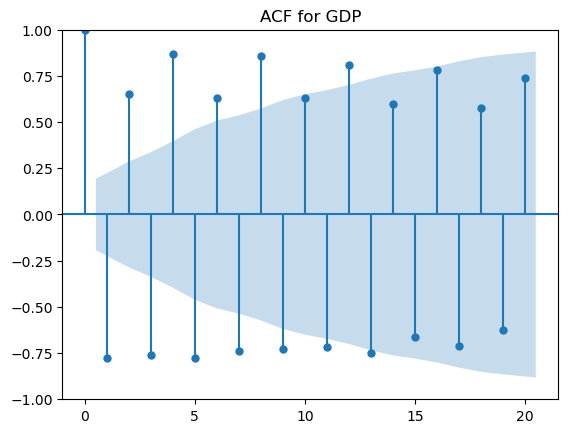

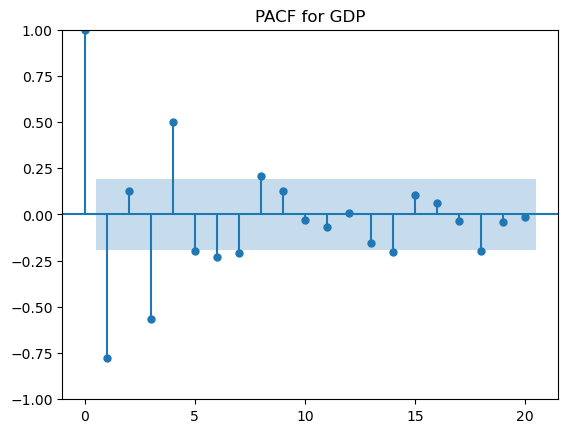

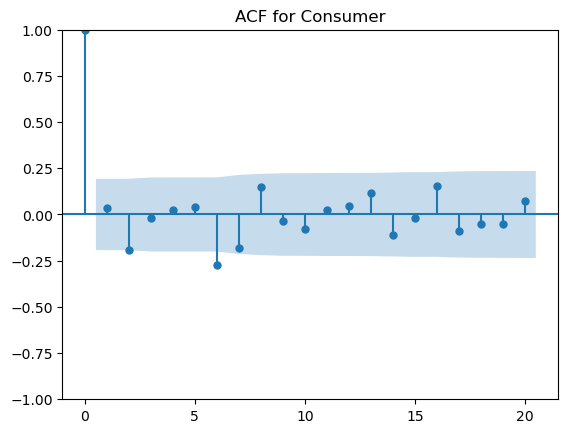

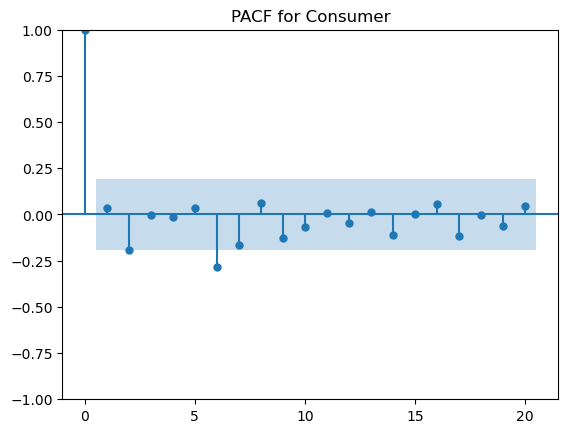

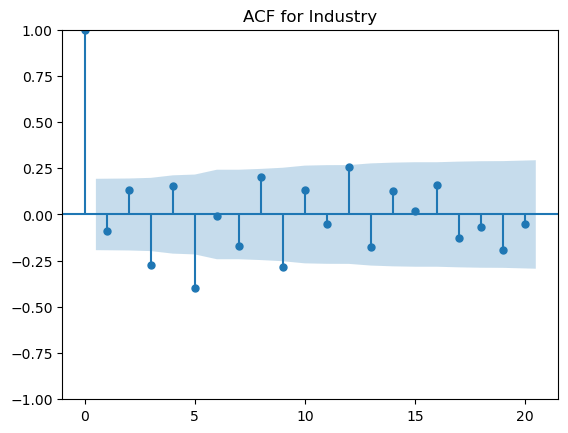

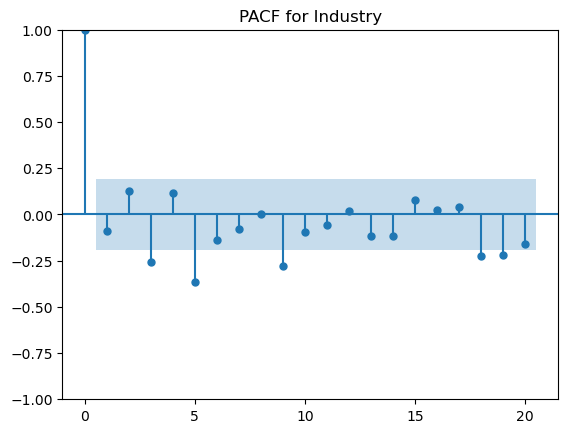

In [21]:
#Checking the data's acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF for gdp
plot_acf(gdp_train['diff'].dropna(), lags=20)
plt.title('ACF for GDP')
plt.show()

# Plot the PACF for gdp
plot_pacf(gdp_train['diff'].dropna(), lags=20)
plt.title('PACF for GDP')
plt.show()

# Plot the ACF for cons
plot_acf(cons_train['diff'].dropna(), lags=20) 
plt.title('ACF for Consumer')
plt.show()

# Plot the PACF for cons
plot_pacf(cons_train['diff'].dropna(), lags=20)
plt.title('PACF for Consumer')
plt.show()

# Plot the ACF for indu
plot_acf(indu_train['diff'].dropna(), lags=20)
plt.title('ACF for Industry')
plt.show()

# Plot the PACF for indu
plot_pacf(indu_train['diff'].dropna(), lags=20)
plt.title('PACF for Industry')
plt.show()

#gdp shows significant lags until around 12.
#cons do not show significant lags.
#indu do not show significant lags.

In [22]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

#Resetting the index
gdp_train.reset_index(drop=True, inplace=True)
indu_train.reset_index(drop=True, inplace=True)
cons_train.reset_index(drop=True, inplace=True)

# Combine the explanatory variables into a single DataFrame
exog = pd.concat([indu_train['Value'].dropna() , cons_train['Value'].dropna()], axis=1)
exog.columns = ['Value_indu', 'Value_cons']

# Define the range of values for p, d, and q
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

# Create a list of all possible combinations of p, d, and q
param_combinations = list(itertools.product(p_values, d_values, q_values))

# Initialize variables to store the best model and its AIC value
best_model = None
best_aic = float('inf')

# Iterate over all combinations of p, d, and q
for params in param_combinations:
    try:
        # Create the ARIMA model with the current parameters
        model = ARIMA(gdp_train['Value'].dropna(), order=params, exog=exog)
        
        # Fit the model
        model_fit = model.fit()
        
        # Get the AIC value of the model
        aic = model_fit.aic
        
        # Check if the current model has a lower AIC value than the best model so far
        if aic < best_aic:
            best_model = model_fit
            best_aic = aic
    except:
        continue

# Print the summary of the best model
print(best_model.summary())

#The best model is a ARIMA(1,2,2)

c:\Users\madst\.conda\envs\myenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\madst\.conda\envs\myenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\madst\.conda\envs\myenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\madst\.conda\envs\myenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\madst\.conda\en

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  104
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -347.690
Date:                Mon, 18 Mar 2024   AIC                            707.380
Time:                        12:10:24   BIC                            723.130
Sample:                             0   HQIC                           713.757
                                - 104                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Value_indu     0.1391      0.104      1.340      0.180      -0.064       0.343
Value_cons    -0.6872      0.310     -2.215      0.027      -1.295      -0.079
ar.L1         -0.9980      0.006   -165.735      0.0

c:\Users\madst\.conda\envs\myenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\madst\.conda\envs\myenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


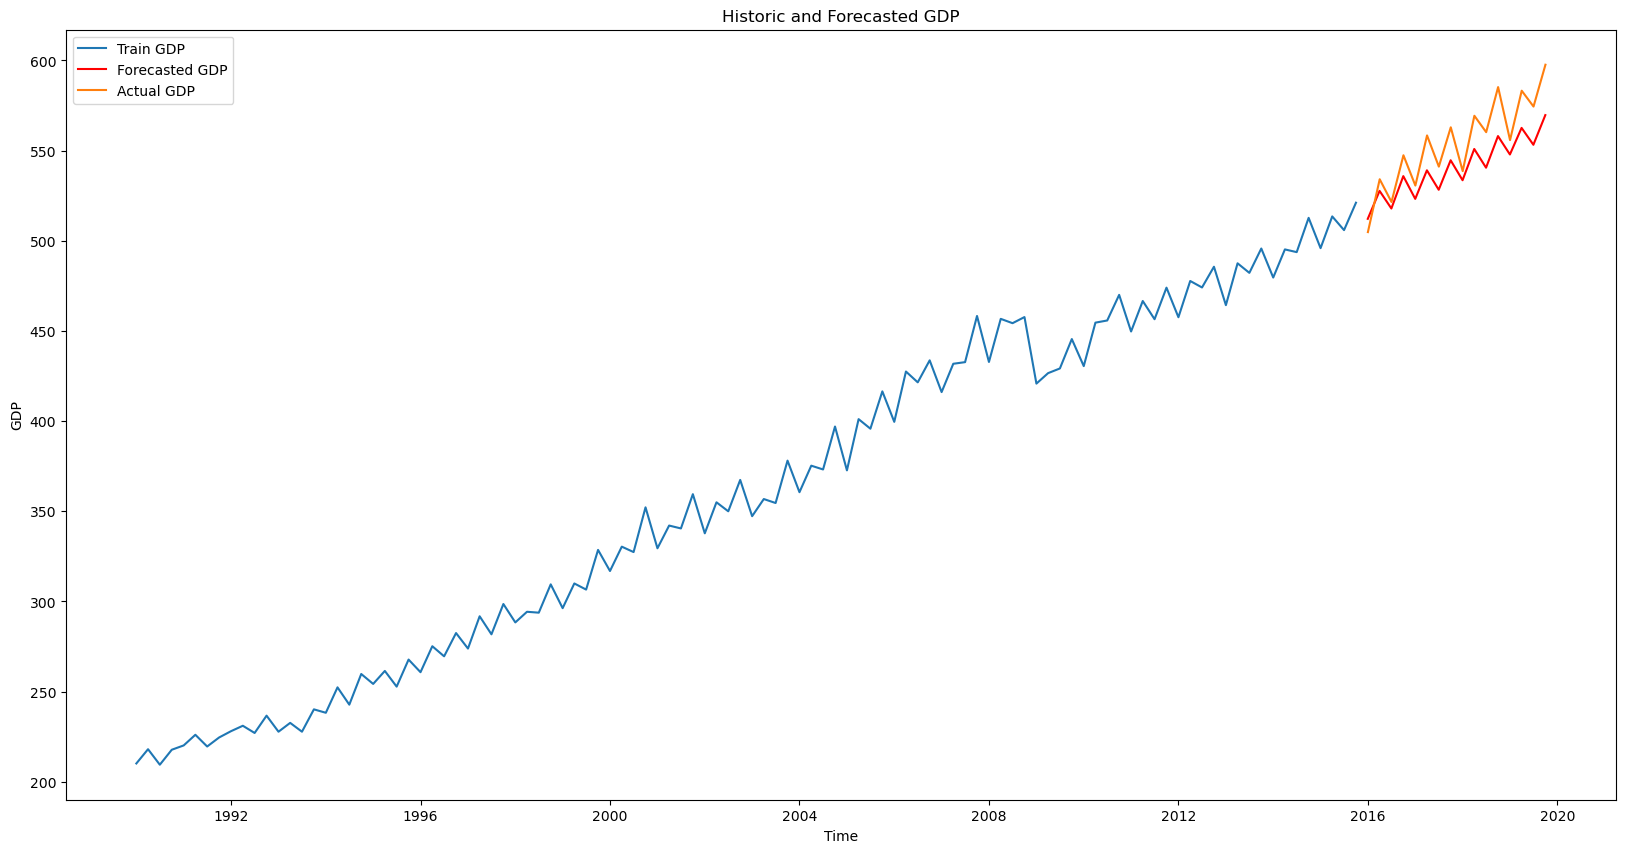

In [23]:
# Forecast 16 quarters ahead based on test indu and cons
fut_exog = pd.concat([indu_test['Value'].dropna(), cons_test['Value'].dropna()], axis=1)
fut_exog.columns = ['Value_indu', 'Value_cons']

forecast = model_fit.get_forecast(steps=16, exog=fut_exog.iloc[-16:])

# Get the forecasted values
forecast_values = forecast.predicted_mean

# Define the forecast dates
forecast_dates = pd.date_range(start=gdp_train['Time'].iloc[-1], periods=16, freq='QE')

# Plotting the forecasted values
# Plotting historic GDP and forecasted GDP
plt.figure(figsize=(20,10))
plt.plot(gdp_train['Time'], gdp_train['Value'], label='Train GDP')
plt.plot(forecast_dates, forecast_values, color='red', label='Forecasted GDP')
plt.plot(gdp_test['Time'], gdp_test['Value'], label='Actual GDP')

# Set the title and labels
plt.title('Historic and Forecasted GDP')
plt.xlabel('Time')
plt.ylabel('GDP')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [24]:
#Comparing the forecasted values with the actual values trough RMSE
# Calculate the RMSE
rmse_value = rmse(gdp_test['Value'], forecast_values)

# Print the RMSE
print("The RMSE is", rmse_value)

#The RMSE is 16,5. This is a good result, as the GDP is a very volatile variable.

The RMSE is 16.540138830740432
